In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn import metrics
iris_dset = pd.read_csv("F:/dinesh/Great Lakes/Machine learning/Python/Lab/2nd residency/External/Iris.csv")
iris = pd.read_csv("F:/dinesh/Great Lakes/Machine learning/Python/Lab/2nd residency/External/Iris.csv")


In [3]:
##Printing 10 random rows from the data set
#iris_dset.head()
#iris_dset.iloc[2:3]

r = np.random.randint(low = 0,high = len(iris_dset), size = 10)
for i in r:
    print(iris_dset.iloc[i:(i+1)])

    Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
98                   5.1                  2.5                   3.0   

    Petal width (in cm)            Class  
98                  1.1  Iris-versicolor  
    Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
48                   5.3                  3.7                   1.5   

    Petal width (in cm)        Class  
48                  0.2  Iris-setosa  
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
123                   6.3                  2.7                   4.9   

     Petal width (in cm)           Class  
123                  1.8  Iris-virginica  
    Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
72                   6.3                  2.5                   4.9   

    Petal width (in cm)            Class  
72                  1.5  Iris-versicolor  
    Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
21                 

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
#Checking missing values
iris_dset.shape
iris_dset.notna().sum()
iris_dset.isna().sum()
##iris_dset.isnull().any()
print("No missing vlaues found")

(150, 5)

Sepal Length (in cm)    150
Sepal Width in (cm)     150
Petal length (in cm)    150
Petal width (in cm)     150
Class                   150
dtype: int64

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

No missing vlaues found


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [5]:
##Change all the classes to numericals (0to2).
iris_dset.dtypes
##iris_dset["Class"] = np.where(iris_dset["Class"] == "Iris-setosa",0,(np.where(((iris_dset["Class"] == "Iris-versicolor")),1,2 )))
##iris_nset = iris_dset
##iris_nset1 = iris_dset
## can be converted to category in turn which hold array value 0,1,2 , Corr() wont work on it, as it expets number.
iris_dset["Class"] = iris_dset["Class"].astype("category")
iris_dset["Class_Code"] = iris_dset["Class"].cat.codes

iris_dset.dtypes
iris_dset["Class"].value_counts()
iris_dset["Class_Code"].value_counts()
print("added new column Class_Code converting Class column to Numericals for Corr")

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

Sepal Length (in cm)     float64
Sepal Width in (cm)      float64
Petal length (in cm)     float64
Petal width (in cm)      float64
Class                   category
Class_Code                  int8
dtype: object

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

2    50
1    50
0    50
Name: Class_Code, dtype: int64

added new column Class_Code converting Class column to Numericals for Corr


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [6]:
corr_data = iris_dset.corr()
corr_data.iloc[:,[4]]

#list(chain.from_iterable(corr_data.iloc[:,[4]]))
print("Last column is 1 since Correlaiton happens on same column")
for k in corr_data["Class_Code"]:
    if (-0.1 <= k <= 0.1):
        print ("Independent vs Dependent Weak Correlation found")

print("No correlation in range -0.1 to 0.1, So no column dropped")

,Class_Code
Sepal Length (in cm),0.782561
Sepal Width in (cm),-0.419446
Petal length (in cm),0.949043
Petal width (in cm),0.956464
Class_Code,1.000000


Last column is 1 since Correlaiton happens on same column
No correlation in range -0.1 to 0.1, So no column dropped


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [7]:
iris_dset.var()

for j in iris_dset.var():
    l = []
    if j < 0.1:
        print("Variance less than 0.1 found")

print("There is no independent variables variance with < 0.1, So no column dropped")

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class_Code              0.671141
dtype: float64

There is no independent variables variance with < 0.1, So no column dropped


## Question 6

*Plot the scatter matrix for all the variables.*

Class without converstion


Class as integer with converstion


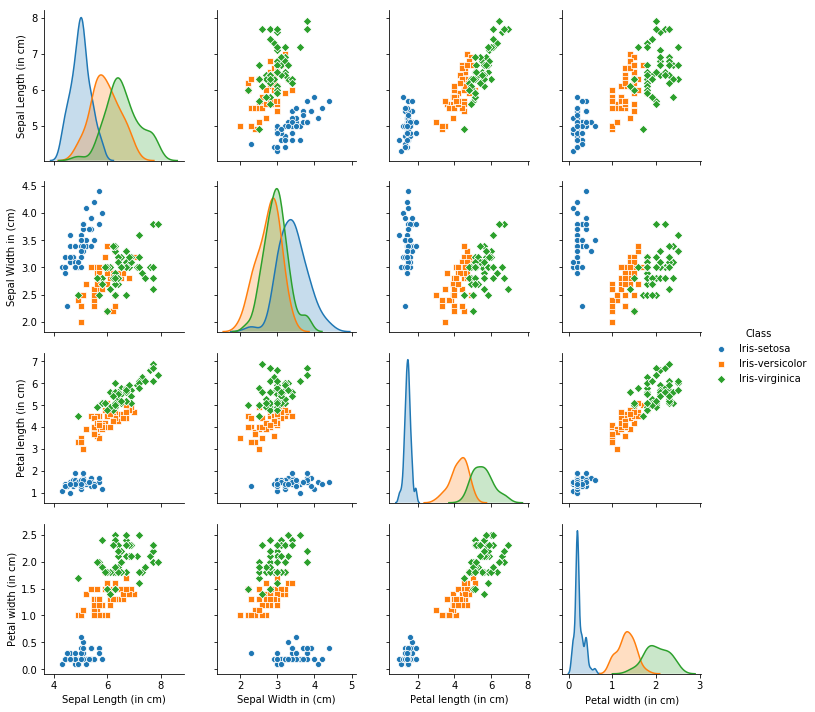

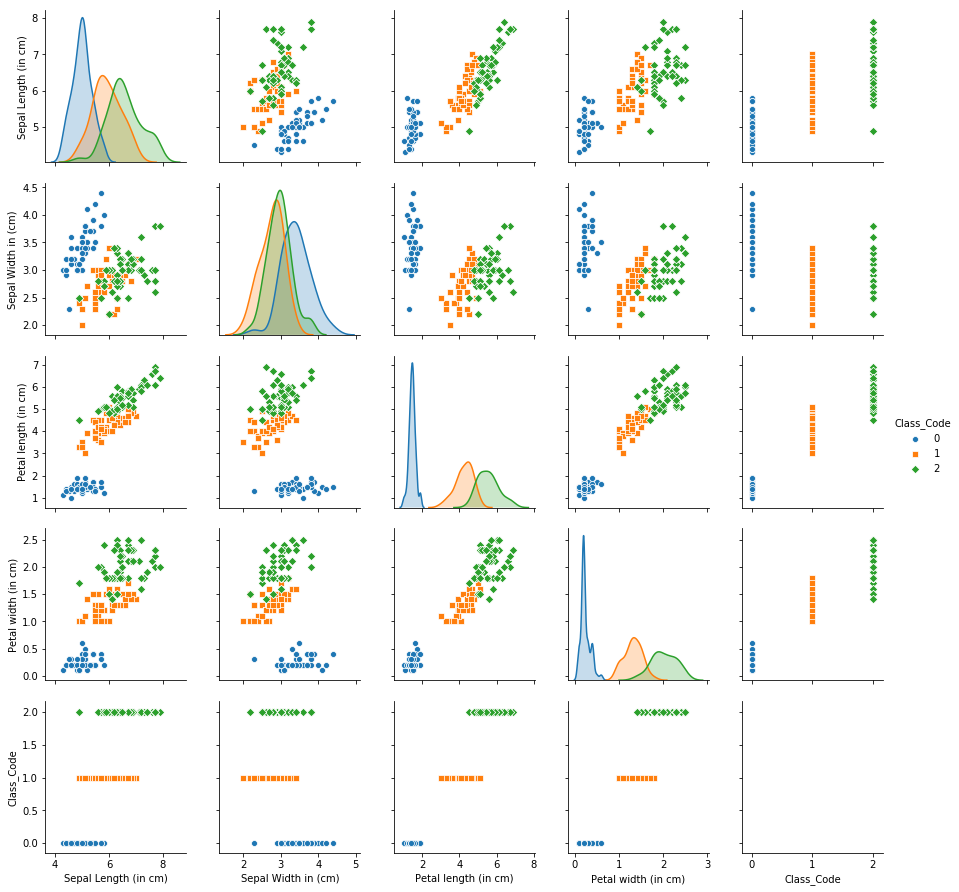

In [8]:
#spm = pd.tools.plotting.scatter_matrix(iris_dset, alpha=0.2, figsize=(10, 10), diagonal='hist')
# Using Seaborn
print("Class without converstion")
sns.pairplot(iris,hue = "Class",markers= ["o", "s", "D"])

print("Class as integer with converstion")
sns.pairplot(iris_dset,hue = "Class_Code",markers= ["o", "s", "D"])


## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [9]:
iris_feature_df = iris_dset.drop(labels= ["Class","Class_Code"] , axis = 1)
iris_feature_df.head()
iris_feature_df = iris_feature_df.apply(zscore)  # convert all attributes to Z scale 
iris_feature_df.describe().transpose()
iris_feature_target = iris_dset["Class"]
X = np.array(iris_feature_df)
X.shape
iris_feature_target.head()
y = np.array(iris_feature_target)
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,-2.775558e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
Sepal Width in (cm),150.0,-5.140333e-16,1.00335,-2.438987,-0.587764,-0.124958,0.569251,3.114684
Petal length (in cm),150.0,1.154632e-16,1.00335,-1.568735,-1.227541,0.336266,0.762759,1.786341
Petal width (in cm),150.0,9.251859e-16,1.00335,-1.444450,-1.181504,0.133226,0.790591,1.710902


(150, 4)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: category
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

(150,)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [10]:
##K = 3
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels_3 = NNH.predict(X_test)
metrics.accuracy_score(y_test,predicted_labels_3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

1.0

In [11]:
##K = 5
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels_5 = NNH.predict(X_test)
metrics.accuracy_score(y_test,predicted_labels_5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

0.9666666666666667

In [12]:
##K = 9
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels_9 = NNH.predict(X_test)
metrics.accuracy_score(y_test,predicted_labels_9)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

1.0

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*